In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/santander-customer-transaction-prediction/test.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv


In [3]:
#importing data
train=pd.read_csv('../input/santander-customer-transaction-prediction/train.csv')
test=pd.read_csv("../input/santander-customer-transaction-prediction/test.csv")
submit=pd.read_csv("../input/santander-customer-transaction-prediction/sample_submission.csv")

In [4]:
#Exploratory data analysis
train.shape

(200000, 202)

In [5]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
#Statistical summary of data
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


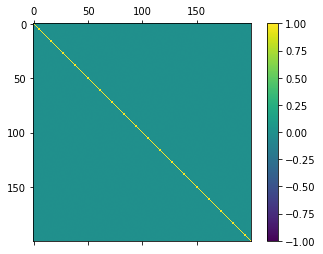

In [7]:
#Using pearson correlation matrix for finding correlated features
import matplotlib.pyplot as plt
correlations = train.drop(['ID_code','target'],axis=1).corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
plt.show()

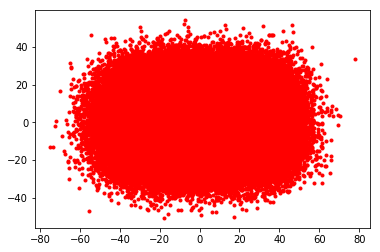

In [8]:
#Using PCA for multicollinearoty and outlier detection
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA(n_components=2)
X=train.drop(['ID_code','target'],axis=1).values
X_pca=pca.fit_transform(X)
plt.plot(X_pca[:,0],X_pca[:,1],'r.')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,train['target'].values,test_size=.2,stratify=train['target'].values)

In [10]:
# For base line prediction
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model=LogisticRegression()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
print("f1_score=",f1_score(Y_test,prediction))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f1_score= 0.3853868194842407


In [20]:
#Defining f1 score using keras backend
from keras import backend as K
def precision(y_true,y_pred):
    tp=K.sum(K.round(y_true*y_pred))
    tp_fn=K.sum(K.round(y_pred))
    prec=tp/(tp_fn+K.epsilon())
    return prec
def recall(y_true,y_pred):
    tp=K.sum(K.round(y_true*y_pred))
    tp_fp=K.sum(K.round(y_true))
    rec=tp/(tp_fp+K.epsilon())
    return rec
def f1score(y_true,y_pred):
    prec=precision(y_true,y_pred)
    rec=recall(y_true,y_pred)
    return 2*((prec*rec)/(rec+prec+K.epsilon()))

In [21]:
K.eval(K.variable(np.array([1,2]))),K.variable(0)

(array([1., 2.], dtype=float32),
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>)

In [22]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

As can be seen there is no appreciable amount of multicollinearity or outliers or univariate collinear features.

In [23]:
from keras import Model
from keras import layers,Input
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier

In [37]:
#SMOTE oversampling for balancing data

from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy=.7)
X_res,Y_res=sm.fit_resample(X,train['target'].values)

X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=.01,stratify=Y_res)

In [40]:
def build_model():
    x=Input(shape=(200,))
    y=layers.Dense(256,activation='relu',name=str(128))(x)
    y=layers.Dense(128,activation='relu',name=str(64_1))(y)
    y=layers.Dense(64,activation='relu',name=str(64_2))(y)
    y=layers.Dense(32,activation='relu',name=str(64_3))(y)
    y=layers.Dense(16,activation='relu',name=str(16))(y)
    y=layers.Dropout(.2)(y)
    y=layers.Dense(1,activation='sigmoid',name=str(1))(y)
    model=Model(input=x,output=y)
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=[f1score])
    return model

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("1_...)`
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("1_...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 302774 samples, validate on 3059 samples
Epoch 1/100
302774/302774 [==============================] - 8s 28us/step - loss: 0.5363 - f1score: 0.6096 - val_loss: 0.4425 - val_f1score: 0.7828
Epoch 2/100
302774/302774 [==============================] - 8s 27us/step - loss: 0.4375 - f1score: 0.7433 - val_loss: 0.3784 - val_f1score: 0.7993
Epoch 3/100
302774/302774 [==============================] - 8s 27us/step - loss: 0.4004 - f1score: 0.7734 - val_loss: 0.3745 - val_f1score: 0.8215
Epoch 4/100
302774/302774 [==============================] - 8s 27us/step - loss: 0.3760 - f1score: 0.7931 - val_loss: 0.4251 - val_f1score: 0.8020
Epoch 5/100
302774/302774 [==============================] - 8s 27us/step - loss: 0.3594 - f1score: 0.8040 - val_loss: 0.3464 - val_f1score: 0.8106
Epoch 6/100
302774/302774 [==============================] - 8s 27us/step - loss: 0.3476 - f1score: 0.8129 - val_loss: 0.3608 - val_f1score: 0.7759
Epoch 7/100
302774/302774 [==============================] - 8

Epoch 56/100
302774/302774 [==============================] - 9s 29us/step - loss: 0.2082 - f1score: 0.8981 - val_loss: 0.7663 - val_f1score: 0.8595
Epoch 57/100
302774/302774 [==============================] - 8s 28us/step - loss: 0.2118 - f1score: 0.8987 - val_loss: 0.3880 - val_f1score: 0.8118
Epoch 58/100
302774/302774 [==============================] - 8s 28us/step - loss: 0.2108 - f1score: 0.8989 - val_loss: 0.7054 - val_f1score: 0.8638
Epoch 59/100
302774/302774 [==============================] - 8s 28us/step - loss: 0.2100 - f1score: 0.8993 - val_loss: 0.7752 - val_f1score: 0.8556
Epoch 60/100
302774/302774 [==============================] - 8s 28us/step - loss: 0.2168 - f1score: 0.8983 - val_loss: 1.0566 - val_f1score: 0.8743
Epoch 61/100
302774/302774 [==============================] - 8s 28us/step - loss: 0.2113 - f1score: 0.8989 - val_loss: 1.1321 - val_f1score: 0.8671
Epoch 62/100
302774/302774 [==============================] - 8s 28us/step - loss: 0.2056 - f1score: 0.900

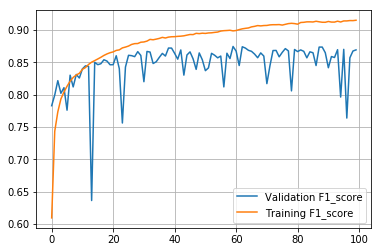

In [41]:
model=KerasClassifier(build_fn=build_model,epochs=100,batch_size=256,validation_data=[X_test,Y_test],verbose=1)
plot_model(build_model())
#history=model.fit(X_train,Y_train,epochs=10,batch_size=512,validation_data=[X_test,Y_test])
history=model.fit(X_train,Y_train)
val_orig=history.history['val_f1score']
accuracy=history.history['f1score']
plt.plot(val_orig,label='Validation F1_score')
plt.plot(accuracy,label='Training F1_score')
plt.legend(loc='best')
plt.grid()
plt.show()

